# Suicide Rates from 1985 to 2016 Analysis

#### CMSC320 Final Tutorial
#### Author: Yuexuan Li

### 1. Introduction

Since every suicide is a tragedy that affects families, communities and entire countries and has long-lasting effects on the people left behind. I am curious about what are the factors that cause someone has the thought such that intentionally causing themselves to die.
In this project, I am going to analyze the suicide rates among different cohorts globally. I will visualize and compare the features that relate to the worldwide suicide rate. That is, I am going to explore the relationship between suicide rate with gender, age, and generation. Then I will compare the regressor medols that can help us make a reasonable prediction.

### 2. Required Library

- pandas and numpy: used for dataframe manipulation
- matplotlib and seaborn: used to make graph that visualize data
- sklearn and statsmodels: used in machine learning analysis

In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import RobustScaler
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor

### 3. Data information

- this dataset contains 12 features with total of 27820 observations.
- dataset is downloaded from Kaggle: https://www.kaggle.com/russellyates88/suicide-rates-overview-1985-to-2016?select=master.csv

### 4. Data Preparation

First, load the data from the web and download it as a csv file. Then use pandas.read_csv to read the csv file into DataFrame. Since there are 12 variables and not every single of them is useful, I decide to analyze only the most relevant varaiables for this analysis. Here are some samples from the dataset: 

In [80]:
df = pd.read_csv("/content/master.csv")
# rename some of the columns to make the process easier
df.rename(columns={"suicides/100k pop": "suicides_pop", "HDI for year": "HDI_for_year", " gdp_for_year ($) ": "gdp_for_year", "gdp_per_capita ($)": "gdp_per_capita"}, inplace = True)
df.head()

,country,year,sex,age,suicides_no,population,suicides_pop,country-year,HDI_for_year,gdp_for_year,gdp_per_capita,generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


From the dataframe, you may notice that HDI_for_year column has more than 70% missing values and this feature will not be used in analysis process, so let's just drop it;
Also, country-year column contains repeated information, drop that either. Here's what the sample data should look like after manipulation:

In [81]:
df = df.drop(['country-year'], axis=1)
df = df.drop(['HDI_for_year'], axis=1)
df.head()

,country,year,sex,age,suicides_no,population,suicides_pop,gdp_for_year,gdp_per_capita,generation
0,Albania,1987,male,15-24 years,21,312900,6.71,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,"2,156,624,900",796,Boomers


### 5. Exploratory Data Analysis

In order for a better anlysis process, I am going to reformat the age 'x-xx years' to 'xx-xx years'.

In [82]:
df["gdp_for_year"] = df["gdp_for_year"].str.replace(",","").astype(np.int64)
df["age"] = df["age"].str.replace("5-14 years","05-14 years")

##### Suicide Number vs. Gender

Now, I want to know how does gender tell us about the suicide rate. Therefore, I am going to use lineplot and bar chart tools to show the trend and distribution. First I want to see how does the number of suicides distributed among gender, so I plan to use plt to show the bar graph.

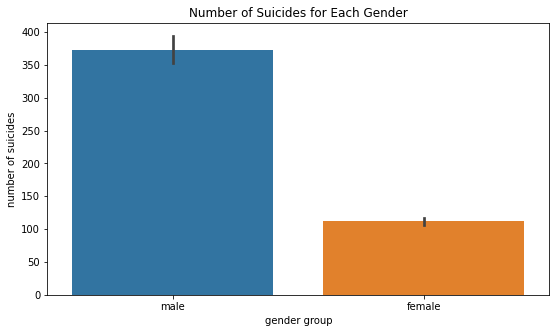

In [83]:
plt.figure(figsize=(9,5))
sns.barplot(x = df['sex'], y = df['suicides_no'])
plt.xlabel('gender group')
plt.ylabel('number of suicides')
plt.title('Number of Suicides for Each Gender')
plt.show()

From the bar graph shown above, it's clearly to see that male tends to have higher number of suicide.

Then I want to see how does the number of suicides by gender changed over year, so I plan to use sns to show the lineplot.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


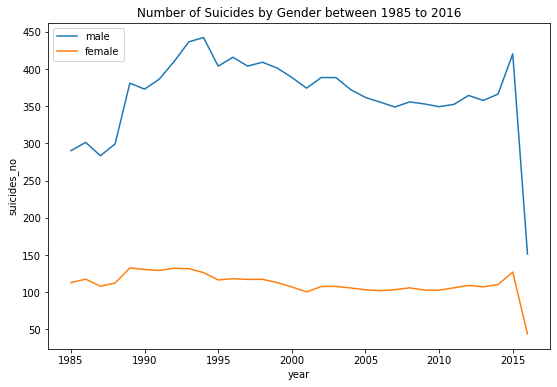

In [84]:
m = df[df.sex == 'male']
f = df[df.sex == 'female']
plt.figure(figsize=(9,6))
plt.title('Number of Suicides by Gender between 1985 to 2016')
sns.lineplot(m.year, df.suicides_no, ci=None)
sns.lineplot(f.year, df.suicides_no, ci=None)
plt.legend(["male", 'female'])
plt.show()

From the lineplot shown above, we can realize that male always has higher suicuide rate than female between 1985 to 2016. For male, the suicide peak occurs between 1990 to 1995; for female, the suicide rate has not fluctuated significantly between 1985 to 2016. However, the suicide rate for both male female has dropped significantly after 2015.

##### Suicide Rate vs. Age

Second, I want to know how does age tell us about the suicide rate which means I want to see how does the number of suicides distributed among age group, so just repeat some of the steps I did above.

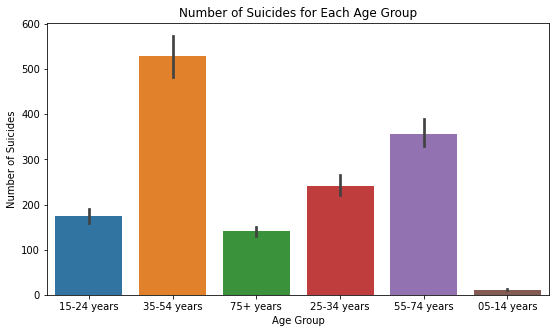

In [85]:
plt.figure(figsize=(9,5))
sns.barplot(x=df['age'], y=df['suicides_no'])
plt.xlabel('Age Group')
plt.ylabel('Number of Suicides')
plt.title('Number of Suicides for Each Age Group')
plt.show()

From the bar garph shown above, we can find that age group 35-54 years tends to have higher number of suicide.

Then I want to see the details about how does the suicide rate by age changed over year, again use sns to show the lineplot.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


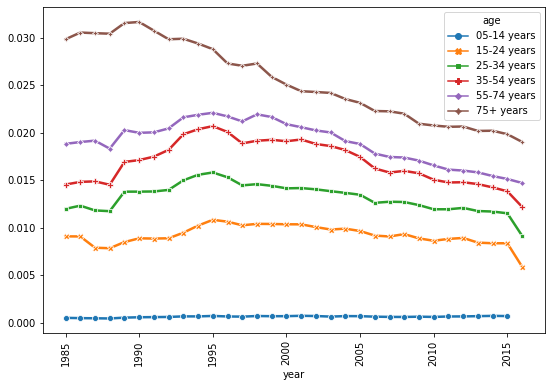

In [86]:
df_age = df.groupby(["year","age"])["suicides_no", "population"].sum()
df_reset = df_age.copy().reset_index()
plt.figure(figsize=(9,6))
sns.lineplot("year", df_reset.suicides_no*100/df_reset.population, hue = "age",
             data = df_reset, linewidth = 2.5, style = "age", markers=True
            , dashes=False)
plt.xticks(rotation = 90)
plt.show()

From the line plot shown above, we can see that 75+ years has the highest suicide rate even though we found that age group 35-54 years has the highest number of suicide from the bar graph. Based on the line plot, we can see that as age is getting higher the suicide rate is also getting higher. Elders are sent to old-age homes which many consider being a prison for them. A lot of old people face financial issues at this age. All these factors together increase the chances of committing suicide.

##### Suicide Rate vs. Generation

Now I want to show how does the suicide rate changed over year for each generation. 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


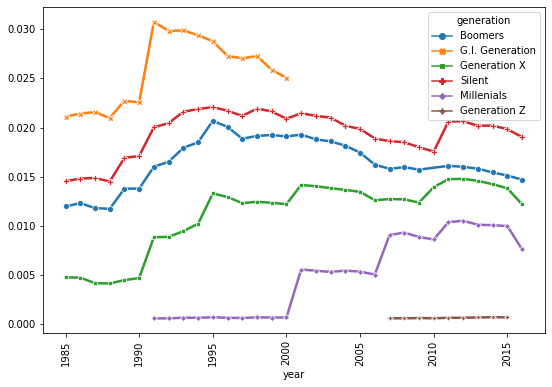

In [87]:
df_generation = df.groupby(["year", "generation"])["suicides_no", "population"].sum()
df_generation_reset = df_generation.copy().reset_index()
plt.figure(figsize=(9,6))
sns.lineplot("year", df_generation_reset.suicides_no*100/df_generation_reset.population, hue = "generation", 
            data = df_generation_reset, linewidth = 2.5, style = "generation", markers=True
            , dashes=False)
plt.xticks(rotation = 90)
plt.show()

So from the line plot shown above, we can see that G.I. Generation has higher suicide rate than other generations before 2000. This result is not surprised because G.I. Generation also known as the World War II Generation. People sufferred a lot during that gloomy period. They experienced so many unimaginable and inhumane things. Trauma after war caused such this high suicide rate during that period;
Followed by that, the suicide rate for Silent and Boomers generations are also relatively high;
Surprisely, Generation Z has the lowest suicide rate amongst all generations. It's been commonly perceived that suicidal behaviors are most common in people of current generations which is the Generation Z since they get more pressure from society. And these people are more likely to get mental health issues. However, with the progress of society and the improvement of social services, the people in current generation are more likely to receive mental health treatment compared to other generations. That's probably the reason why Generation Z doesn't have that high suicide rate.

##### 6. Hypothesis Testing and Machine Learning

Now I am going to analyze the relationship between suicide population and other variables using linear regression. First I will scale these numerical data with outliers using robustScaler method. Since not all variables are numerical, I will use LabelEncoder method to label these categorical variable using numerical values.

In [88]:
numerical = ['suicides_no', 'population', 'suicides_pop', 
              'gdp_for_year','gdp_per_capita']
categorical = ['country', 'year','age', 'sex', 'generation']
rc = RobustScaler()
df[numerical] = rc.fit_transform(df[numerical])
le = sklearn.preprocessing.LabelEncoder()
for c in categorical:
    df[c] = le.fit_transform(df[c])
df.head()

,country,year,sex,age,suicides_no,population,suicides_pop,gdp_for_year,gdp_per_capita,generation
0,0,2,1,1,-0.031250,-0.084435,0.045860,-0.182942,-0.400243,2
1,0,2,1,3,-0.070312,-0.087963,-0.050955,-0.182942,-0.400243,5
2,0,2,0,1,-0.085938,-0.101142,-0.073885,-0.182942,-0.400243,2
3,0,2,1,5,-0.187500,-0.294064,-0.089172,-0.182942,-0.400243,1
4,0,2,1,2,-0.125000,-0.112232,-0.172611,-0.182942,-0.400243,0


Now splitting the data

In [89]:
X_data = df
y_data = df['suicides_pop']
lm = LinearRegression()
lm.fit(X_data, y_data)

model = sm.OLS(y_data, X_data).fit()
pred = model.predict(X_data)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:           suicides_pop   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          3.528e+33
Date:                Mon, 20 Dec 2021   Prob (F-statistic):                        0.00
Time:                        06:37:35   Log-Likelihood:                      9.1776e+05
No. Observations:               27820   AIC:                                 -1.835e+06
Df Residuals:                   27810   BIC:                                 -1.835e+06
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
country        -1.735e-18   2.09e-19     -8.285      0.000   -2.15e-18   -1.32e-18
year            3.936e-17      8e-19     49.191      0.000    3.78e-17    4.09e-17
sex            -1.221e-15   1.42e-17    -85.988      0.000   -1.25e-15   -1.19e-15
age             1.725e-16   3.87e-18     44.583      0.000    1.65e-16     1.8e-16
suicides_no    -1.691e-17   1.33e-18    -12.681      0.000   -1.95e-17   -1.43e-17
population      3.643e-16    4.1e-18     88.789      0.000    3.56e-16    3.72e-16
suicides_pop       1.0000   6.98e-18   1.43e+17      0.000       1.000       1.000
gdp_for_year    -1.18e-16   1.79e-18    -65.795      0.000   -1.21e-16   -1.14e-16
gdp_per_capita -7.286e-17   8.76e-18     -8.322      0.000      -9e-17   -5.57e-17
generation     -2.233e-16   3.77e-18    -59.264      0.000   -2.31e-16   -2.16e-16
==============================================================================
Omnibus:                     4325.552   Durbin-Watson:                   1.355
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            13795.815
Skew:                          -0.801   Prob(JB):                         0.00
Kurtosis:                       6.056   Cond. No.                         126.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

From the regression results, since the p-value for each indepedent variable is so small, we can say that all variables in X_data are some how impact the dependent variable suicides_pop.

##### Random Forest Regressor

Here, I will use two different models to make prediction on the dataset and compare the results, then find the best fit one at the end. I am going to use the X_data and y_data I defined from the last section as X and y where X contains the predictors and y contains the value(suicides_pop) that we want to predict. Random Forest is a supervised learning algorithm that is based on the ensemble learning method and many Decision Trees. So let's look at the random forest regressor first.

In [90]:
X, y = X_data, y_data

# split the data into validation train and validation test
X1, X2, y1, y2 = train_test_split(X, y, train_size = 0.2)
rf = RandomForestRegressor(random_state = 1)

# fit the model on one set of data
rf.fit(X1,y1)

# evaluate the model on the second set of data
pred_train = rf.predict(X1)
pred_test = rf.predict(X2)

rmse_train = np.sqrt(mean_squared_error(y1,pred_train))
rmse_test = np.sqrt(mean_squared_error(y2, pred_test))

train = r2_score(y1, pred_train)
test = r2_score(y2, pred_test)

print('Random Forest Regression: The RMSE of the training set is:', rmse_train)
print('Random Forest Regression: The RMSE of the testing set is:', rmse_test)
print("Random Forest Regression: R^2 on training Data:", train)
print("Random Forest Regression: R^2 on testing Data:", test)

Random Forest Regression: The RMSE of the training set is: 0.009086367516275293
Random Forest Regression: The RMSE of the testing set is: 0.050898241220869014
Random Forest Regression: R^2 on training Data: 0.9999454882583175
Random Forest Regression: R^2 on testing Data: 0.9982065567205983


From the results shown above, the random forest regressor gives us the R^2 for testing data is around 0.98 and the RMSE of the testing set is about 0.15. Since we got a high R^2 value and low enough RMSE value, it's happy to say that this is a good model to make prediciton. 

##### Linear Regressor

Linear regression is perhaps one of the most well known and well understood algorithms in statistics and machine learning. So I will continue what I did and move on to linear regressor to solve regression tasks.

In [91]:
X, y = X_data, y_data

# split the data into validation train and validation test
X1, X2, y1, y2 = train_test_split(X, y, train_size = 0.2)
lr = LinearRegression()

# fit the model on one set of data
lr.fit(X1,y1)

# evaluate the model on the second set of data
pred_train = lr.predict(X1)
pred_test = lr.predict(X2)

rmse_train = np.sqrt(mean_squared_error(y1,pred_train))
rmse_test = np.sqrt(mean_squared_error(y2, pred_test))

train = r2_score(y1, pred_train)
test = r2_score(y2, pred_test)

print("Linear Regressor: The RMSE of the training set is:", rmse_train)
print("Linear Regressor: The RMSE of the testing set is:", rmse_test)
print("Linear Regressor: R^2 for training Data is:", train)
print("Linear Regressor: R^2 for testing Data is:", test)

Linear Regressor: The RMSE of the training set is: 2.605205228064051e-15
Linear Regressor: The RMSE of the testing set is: 2.5990068547311603e-15
Linear Regressor: R^2 for training Data is: 1.0
Linear Regressor: R^2 for testing Data is: 1.0


From the results shown above, the linear regressor gives us the R^2 for testing data is 1 and the RMSE of the testing set is so small. Both of the two values tell us this could be a better model than random forest regressor.

##### 7. Conclusion

During the analysis, I have done the entire data science pipeline which includes data curation, parsing, and management; exploratory data analysis; hypothesis testing and machine learning analysis. The entire analysis contains well explained prose and well documented code in order to provide readers a better understandable and digestable content.

I have walked though the analysis on exploring the relationship between suicide rate with gender, age, generation. I used bar graph to show the distribution of number of suicide within different group. And used line plot to compare the suicide rate changes within different group over the years. From all the analysis above, we can see that suicide rate is higher in male group; its also higher in elder according to the suicide rate of different age group over the years; moreover, people lived in G.I Generation is more prone to commit suicide. Lastly, I looked into the factors that affect suicide population and find a model that makes a reasonable prediction.

Finally I want to say, people will think of suicide for different reasons. Some of them may act differently than usual when they get suicidal thoughts, but some may don't. If you ever had such this thoughts, please go ask for help immediately. Or if somebody around you ever talked about this, please be patient and communiate with them and help them getting through this.

##### 8. Work Citations


https://medium.com/swlh/effect-of-generation-on-suicide-253571b81778

https://machinelearningmastery.com/robust-scaler-transforms-for-machine-learning/